#  DS PROJECT : Codon Usage : Model Implementations

**GROUP 1**
1. Suvarna Sangram Aglave (2404343)
2. Sanika Nirmal Sahuji (2400145)
3. Kush Rakesh Mehta (2393362)
4. Keerthana Baithini (2382814)

In [3]:
#imports all essential libraries for data manipulation, visualization, and preprocessing.
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from rich import print

In [4]:
#read dataset from cleaned csv fie
# setting low_memory=False because it disables the memory optimization and makes pandas read the entire dataset.
df = pd.read_csv('Group_1_Clean_Data.csv', low_memory=False)
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0.0,100217,1995.000000,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,9,0.0,100220,1474.000000,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,9,0.0,100755,4862.000000,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,9,0.0,100880,1915.000000,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,9,0.0,100887,4051.319086,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


### Part: 2 - Data Preprocessing

In [6]:
#split data into input and output
y = df['Kingdom']
numerical_cols = df.select_dtypes(include=np.number).columns
X = df[numerical_cols[1:]]

In [7]:
X.head()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.0,100217,1995.000000,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.0,100220,1474.000000,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.0,100755,4862.000000,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.0,100880,1915.000000,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.0,100887,4051.319086,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Shape of training data
(10422, 67)

Shape of test data
(2606, 67)

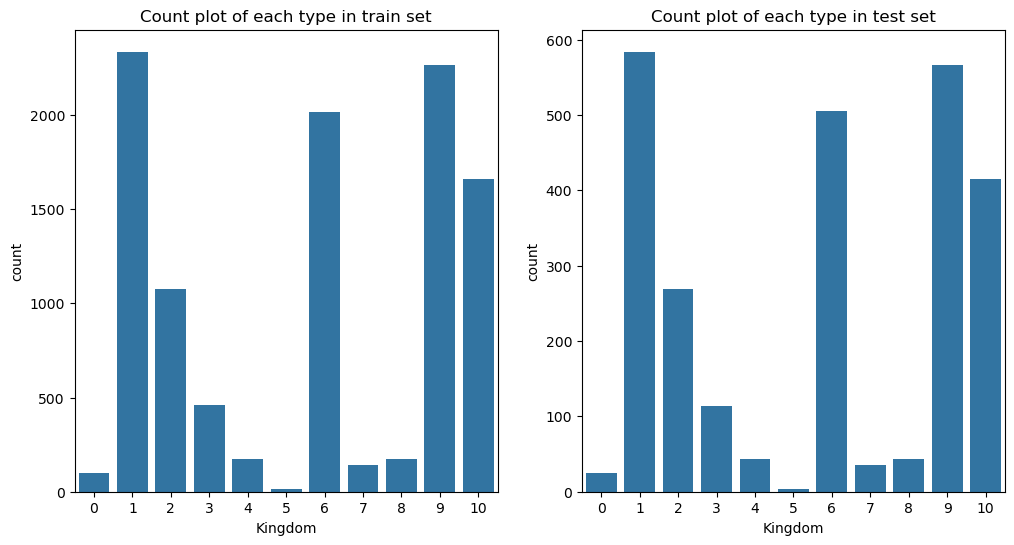

In [8]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 40)

print('Shape of training data', x_train.shape)
print('Shape of test data', x_test.shape)

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x = y_train)
plt.title('Count plot of each type in train set')

plt.subplot(122)
sns.countplot(x = y_test)
plt.title('Count plot of each type in test set' )
plt.show()

---
As we can see from above bar charts data is highly imbalanced we will first try to balance training data using SMOTE

---

Shape of training data
(25696, 67)

Shape of test data
(2606, 67)

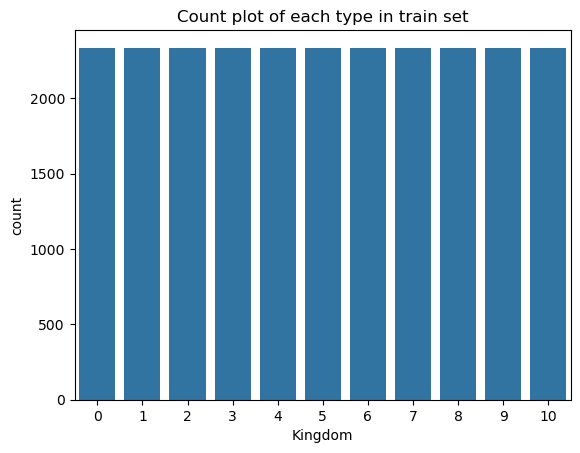

In [10]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
x_train_smt = pd.DataFrame(x_train_smt, columns = x_train.columns)

print('Shape of training data', x_train_smt.shape)
print('Shape of test data', x_test.shape)

sns.countplot(x = y_train_smt)
plt.title('Count plot of each type in train set')
plt.show()

---
We can see that using SMOTE oversampling technique of data was used to balance data. Now we will standardize data.

---

In [12]:
#we will fit smote data on MinMaxScaler
minMaxScaler = MinMaxScaler()
x_train_mm = minMaxScaler.fit_transform(x_train_smt)
x_train_mm = pd.DataFrame(x_train_mm, columns = x_train_smt.columns)
x_test_mm = minMaxScaler.transform(x_test)
x_test_mm = pd.DataFrame(x_test_mm, columns=x_test.columns)

In [13]:
x_train_mm.head()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.0,0.016708,0.275999,0.366915,0.686806,0.125403,0.410573,0.239304,0.548569,0.447149,...,0.973054,0.230478,0.559613,0.268226,0.570903,0.306218,0.587508,0.138004,0.039548,0.528796
1,0.5,0.945115,0.147746,0.556115,0.557308,0.691234,0.501578,0.540160,0.269427,0.517727,...,0.350299,0.325317,0.308843,0.363472,0.358519,0.516129,0.244795,0.426752,0.282486,0.261780
2,0.0,0.026386,0.075882,0.400363,0.294314,0.189624,0.348501,0.310792,0.372444,0.783032,...,0.463074,0.322075,0.233172,0.329811,0.602078,0.485118,0.344665,0.000000,0.000000,0.416380
3,0.0,0.102872,0.397262,0.159178,0.623501,0.019499,0.358233,0.173061,0.417945,0.170376,...,0.897206,0.044042,0.191817,0.296151,0.755142,0.390681,0.327912,0.288747,0.000000,0.712042
4,0.5,0.008735,0.018598,0.432121,0.592403,0.731485,0.537612,0.588739,0.227249,0.556959,...,0.443114,0.119968,0.195337,0.402566,0.288591,0.484806,0.202342,0.377919,0.000000,0.931937


In [14]:
x_test_mm.head()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.0,0.003544,0.236721,0.015515,0.420036,0.006977,0.040505,0.106542,0.690695,0.053547,...,0.338630,0.010538,0.407391,0.174792,0.429720,0.072152,0.615159,0.000000,0.0,0.806283
1,1.0,0.313016,0.005803,0.562361,0.320746,0.550984,0.430300,0.531328,0.073875,0.513407,...,0.191617,0.390165,0.084470,0.552000,0.270838,0.884993,0.172251,0.000000,0.0,0.460600
2,0.5,0.378802,0.162029,0.442176,0.499778,0.318378,0.352446,0.607784,0.256902,0.574910,...,0.190619,0.375034,0.000000,0.202264,0.082918,0.208820,0.140208,0.915074,0.0,0.529937
3,0.0,0.303975,0.047761,0.320371,0.554865,0.067800,0.278801,0.396909,0.425613,0.737135,...,0.226547,0.286409,0.133304,0.422792,0.901494,0.365747,0.455595,0.161359,0.0,0.397906
4,0.0,0.494029,0.442791,0.263550,0.357619,0.211449,0.476328,0.277670,0.244376,0.574910,...,0.225549,0.543637,0.268426,0.345509,0.500974,0.529063,0.515452,0.000000,0.0,0.130890


### Part: 3 - Data Modelling

In [16]:
#define generic function to fit and predict model and print classification report and confusion matrix
def train_model(classifier, x_train, y_train, params):

    '''A function to fit machine learning model on training data 
    Inputs:
        classifier: sklearn classifier class which you want the data to be trained on
        x_train: predictor variable for training set
        y_train: target variable for training set
        params: hyper-parameters to pass into the model.
    Output: 
        fitted classifier on the data (i.e post training classifier)
    '''
    
    #================================================Train the model=================================================
    #fit the passed classifier
    clf = classifier(**params)
    clf.fit(x_train, y_train)

    return clf

#define generic function to predict model and print classification report and confusion matrix
def predict_and_report(clf, clf_name, x_train, y_train, x_test, y_test):

    '''A function to evaluate model performance with classification report and confusion matrix for both train and test set 
    Inputs:
        clf: trained classifier on the data
        clf_name: classifier name for reporting
        x_train: predictor variable for training set
        y_train: target variable for training set
        x_test: predictor variable for test set
        y_test: target variable for test set
    '''

    print('\n\n******************************* Training Data Analysis *******************************')
    # predicting model on the train data and plot confusion matrix
    y_pred_train = clf.predict(x_train)
    
    print(f'[bold]Classification report of {clf_name} on training data is:[/bold]')
    print(classification_report(y_train, y_pred_train))
    print(f'[bold]Accuracy score of {clf_name} on training data is: {clf.score(x_train, y_train)}[/bold]')
    
    print('\n\n******************************* Test Data Analysis *******************************')
    # predicting model on the test data and plot confusion matrix
    y_pred_test = clf.predict(x_test)
    
    print(f'[bold]Classification report of {clf_name} on test data is:[/bold]')
    print(classification_report(y_test, y_pred_test))
    print(f'[bold]Accuracy score of {clf_name} on test data is: {clf.score(x_test, y_test)}[/bold]')

    # plot confusion matrix as heat map
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = pd.DataFrame(cm_train)
    cm_test = pd.DataFrame(cm_test)
            

    fig = plt.figure(figsize=(15, 5))

    plt.subplot(121)
    sns.heatmap(cm_train, annot=True, cmap="crest")
    plt.title('Confusion Matrix on train data')

    plt.subplot(122)
    sns.heatmap(cm_test, annot = True, cmap="flare")
    plt.title('Confusion Matrix on test data')
    plt.show()
    print()

    return

In [17]:
#train all 5 models: Logistic Regression,KNN,RF,SVM:Linear & Non-linear,NB
log_clf = train_model(LogisticRegression, x_train_mm, y_train_smt, dict(max_iter = 1000))
knn_clf = train_model(KNeighborsClassifier, x_train_mm, y_train_smt, dict())
rf_clf = train_model(RandomForestClassifier, x_train_mm, y_train_smt, dict())
svc_clf = train_model(SVC, x_train_mm, y_train_smt, dict(kernel="linear"))
rbf_clf = train_model(SVC, x_train_mm, y_train_smt, dict(kernel="rbf"))
nb_clf = train_model(GaussianNB, x_train_mm, y_train_smt, dict())

### Part: 4.1 - Data Evaluation and Comparison

### Model 1: Logistic Regression Evaluation

******************************* Training Data Analysis *******************************

Classification report of Logistic Regression on training data is:

precision    recall  f1-score   support

           0       0.96      1.00      0.98      2336
           1       0.88      0.81      0.84      2336
           2       0.81      0.79      0.80      2336
           3       0.84      0.80      0.82      2336
           4       0.91      0.94      0.92      2336
           5       0.95      1.00      0.98      2336
           6       0.85      0.83      0.84      2336
           7       0.87      0.91      0.89      2336
           8       0.82      0.84      0.83      2336
           9       0.85      0.86      0.85      2336
          10       0.87      0.84      0.85      2336

    accuracy                           0.87     25696
   macro avg       0.87      0.87      0.87     25696
weighted avg       0.87      0.87      0.87     25696

Accuracy score of Logistic Regression on training data is: 0.8731709215442092

******************************* Test Data Analysis *******************************

Classification report of Logistic Regression on test data is:

precision    recall  f1-score   support

           0       0.43      0.72      0.54        25
           1       0.92      0.82      0.86       584
           2       0.66      0.66      0.66       269
           3       0.68      0.68      0.68       114
           4       0.46      0.93      0.61        44
           5       0.03      0.25      0.06         4
           6       0.85      0.81      0.83       505
           7       0.43      0.81      0.56        36
           8       0.39      0.74      0.51        43
           9       0.88      0.85      0.87       567
          10       0.90      0.79      0.84       415

    accuracy                           0.80      2606
   macro avg       0.60      0.73      0.64      2606
weighted avg       0.83      0.80      0.81      2606

Accuracy score of Logistic Regression on test data is: 0.7954719877206446

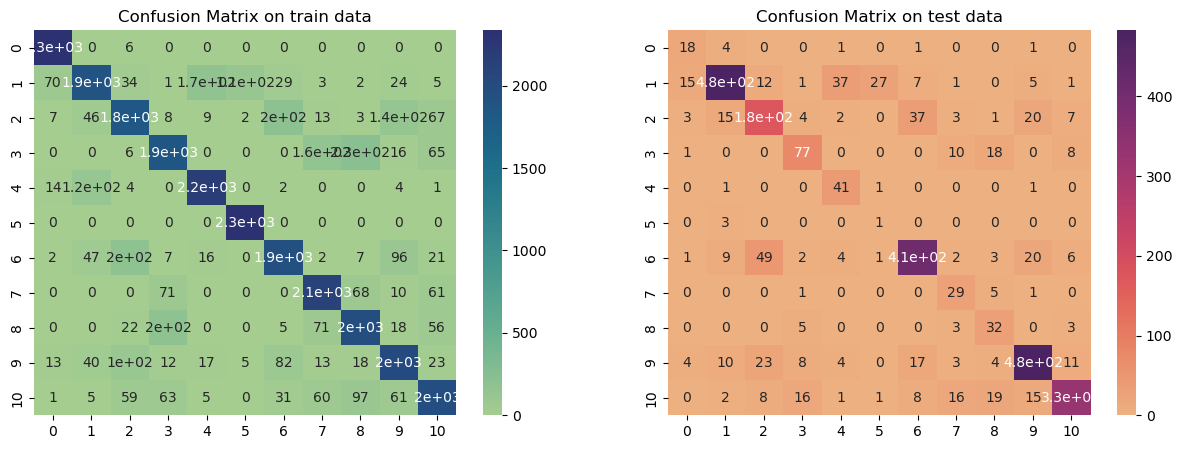

In [20]:
predict_and_report(log_clf, 'Logistic Regression', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 2: K Nearest Neighbors Classifer Evaluation

******************************* Training Data Analysis *******************************

Classification report of K Nearest Neighbors Classifer on training data is:

precision    recall  f1-score   support

           0       0.96      1.00      0.98      2336
           1       0.97      0.87      0.92      2336
           2       0.92      0.96      0.94      2336
           3       0.95      0.99      0.97      2336
           4       0.93      1.00      0.96      2336
           5       0.96      1.00      0.98      2336
           6       0.95      0.92      0.93      2336
           7       0.97      1.00      0.98      2336
           8       0.96      1.00      0.98      2336
           9       0.99      0.91      0.95      2336
          10       0.99      0.91      0.95      2336

    accuracy                           0.96     25696
   macro avg       0.96      0.96      0.96     25696
weighted avg       0.96      0.96      0.96     25696

Accuracy score of K Nearest Neighbors Classifer on training data is: 0.9598770236612703

******************************* Test Data Analysis *******************************

Classification report of K Nearest Neighbors Classifer on test data is:

precision    recall  f1-score   support

           0       0.41      0.96      0.58        25
           1       0.96      0.84      0.90       584
           2       0.75      0.87      0.81       269
           3       0.62      0.83      0.71       114
           4       0.44      0.89      0.59        44
           5       0.05      0.50      0.09         4
           6       0.93      0.87      0.90       505
           7       0.44      0.69      0.54        36
           8       0.56      0.86      0.68        43
           9       0.98      0.85      0.91       567
          10       0.97      0.83      0.90       415

    accuracy                           0.85      2606
   macro avg       0.65      0.82      0.69      2606
weighted avg       0.89      0.85      0.86      2606

Accuracy score of K Nearest Neighbors Classifer on test data is: 0.8499616270145818

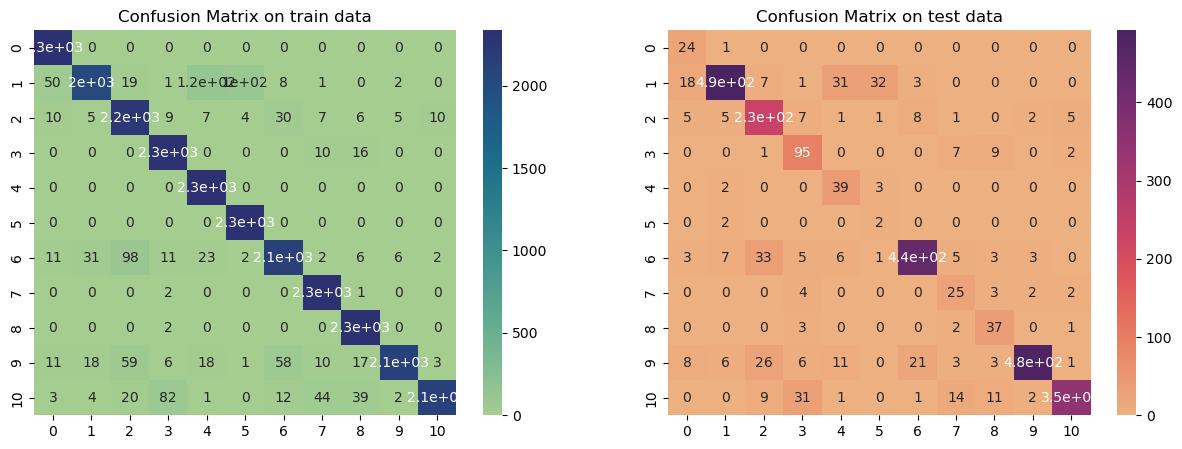

In [22]:
predict_and_report(knn_clf, 'K Nearest Neighbors Classifer', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 3: Random Forest Classifer Evaluation

******************************* Training Data Analysis *******************************

Classification report of Random Forest Classifer on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      2336
           1       1.00      1.00      1.00      2336
           2       1.00      1.00      1.00      2336
           3       1.00      1.00      1.00      2336
           4       1.00      1.00      1.00      2336
           5       1.00      1.00      1.00      2336
           6       1.00      1.00      1.00      2336
           7       1.00      1.00      1.00      2336
           8       1.00      1.00      1.00      2336
           9       1.00      1.00      1.00      2336
          10       1.00      1.00      1.00      2336

    accuracy                           1.00     25696
   macro avg       1.00      1.00      1.00     25696
weighted avg       1.00      1.00      1.00     25696

Accuracy score of Random Forest Classifer on training data is: 1.0

******************************* Test Data Analysis *******************************

Classification report of Random Forest Classifer on test data is:

precision    recall  f1-score   support

           0       0.70      0.84      0.76        25
           1       0.94      0.96      0.95       584
           2       0.84      0.83      0.84       269
           3       0.90      0.82      0.86       114
           4       0.85      0.89      0.87        44
           5       1.00      0.25      0.40         4
           6       0.94      0.92      0.93       505
           7       0.82      0.75      0.78        36
           8       0.77      0.77      0.77        43
           9       0.92      0.96      0.94       567
          10       0.94      0.92      0.93       415

    accuracy                           0.92      2606
   macro avg       0.87      0.81      0.82      2606
weighted avg       0.92      0.92      0.92      2606

Accuracy score of Random Forest Classifer on test data is: 0.9159631619339985

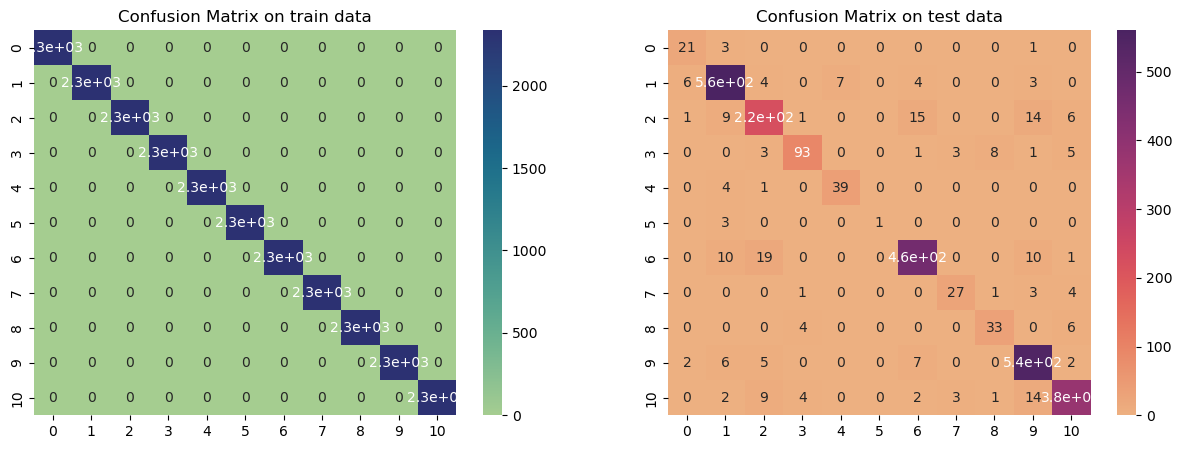

In [24]:
predict_and_report(rf_clf, 'Random Forest Classifer', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 4a: Support Vector Machine Classifer with linear kernel Evaluation

******************************* Training Data Analysis *******************************

Classification report of SVM Classifer with Linear kernel on training data is:

precision    recall  f1-score   support

           0       0.97      1.00      0.99      2336
           1       0.91      0.87      0.89      2336
           2       0.83      0.83      0.83      2336
           3       0.87      0.84      0.86      2336
           4       0.93      0.97      0.95      2336
           5       0.98      1.00      0.99      2336
           6       0.87      0.85      0.86      2336
           7       0.92      0.94      0.93      2336
           8       0.86      0.90      0.88      2336
           9       0.89      0.90      0.90      2336
          10       0.92      0.86      0.89      2336

    accuracy                           0.91     25696
   macro avg       0.91      0.91      0.91     25696
weighted avg       0.91      0.91      0.91     25696

Accuracy score of SVM Classifer with Linear kernel on training data is: 0.9058997509339975

******************************* Test Data Analysis *******************************

Classification report of SVM Classifer with Linear kernel on test data is:

precision    recall  f1-score   support

           0       0.49      0.84      0.62        25
           1       0.91      0.86      0.89       584
           2       0.64      0.72      0.68       269
           3       0.67      0.68      0.68       114
           4       0.53      0.91      0.67        44
           5       0.00      0.00      0.00         4
           6       0.87      0.80      0.83       505
           7       0.49      0.67      0.56        36
           8       0.42      0.70      0.52        43
           9       0.90      0.87      0.89       567
          10       0.92      0.82      0.87       415

    accuracy                           0.82      2606
   macro avg       0.62      0.72      0.66      2606
weighted avg       0.84      0.82      0.82      2606

Accuracy score of SVM Classifer with Linear kernel on test data is: 0.8181120491174213

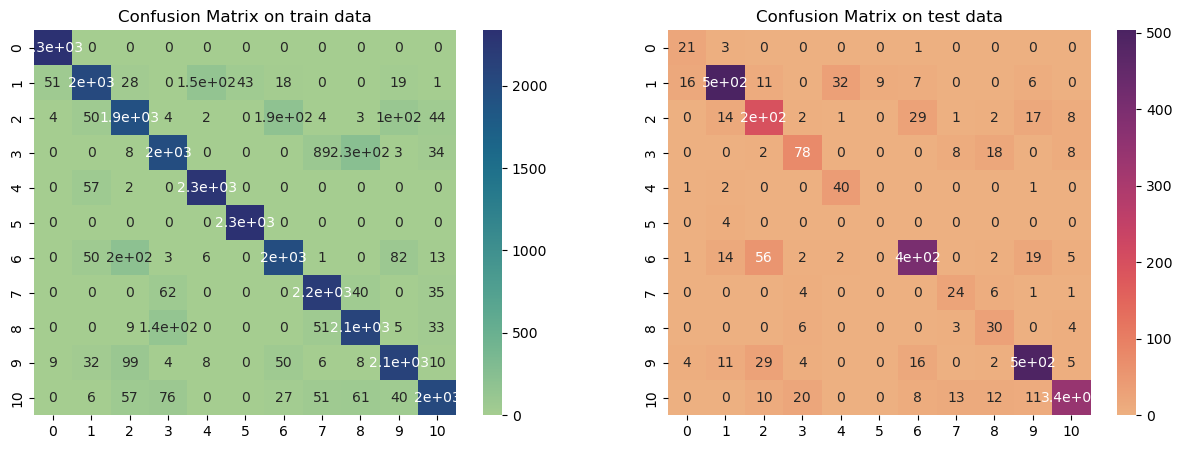

In [26]:
predict_and_report(svc_clf,'SVM Classifer with Linear kernel', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 4b: Support Vector Machine Classifer with non-linear kernel Evaluation

******************************* Training Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      2336
           1       0.98      0.97      0.98      2336
           2       0.97      0.98      0.98      2336
           3       0.99      0.97      0.98      2336
           4       0.99      1.00      0.99      2336
           5       1.00      1.00      1.00      2336
           6       0.98      0.97      0.97      2336
           7       0.99      0.99      0.99      2336
           8       0.98      0.99      0.99      2336
           9       0.98      0.98      0.98      2336
          10       0.99      0.98      0.99      2336

    accuracy                           0.99     25696
   macro avg       0.99      0.99      0.99     25696
weighted avg       0.99      0.99      0.99     25696

Accuracy score of SVM Classifer with Non-Linear kernel on training data is: 0.9855230386052304

******************************* Test Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel on test data is:

precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.95      0.96      0.96       584
           2       0.85      0.87      0.86       269
           3       0.87      0.82      0.84       114
           4       0.80      0.89      0.84        44
           5       0.50      0.50      0.50         4
           6       0.94      0.91      0.93       505
           7       0.75      0.75      0.75        36
           8       0.65      0.74      0.70        43
           9       0.94      0.95      0.95       567
          10       0.95      0.94      0.95       415

    accuracy                           0.92      2606
   macro avg       0.83      0.83      0.83      2606
weighted avg       0.92      0.92      0.92      2606

Accuracy score of SVM Classifer with Non-Linear kernel on test data is: 0.9205679201841903

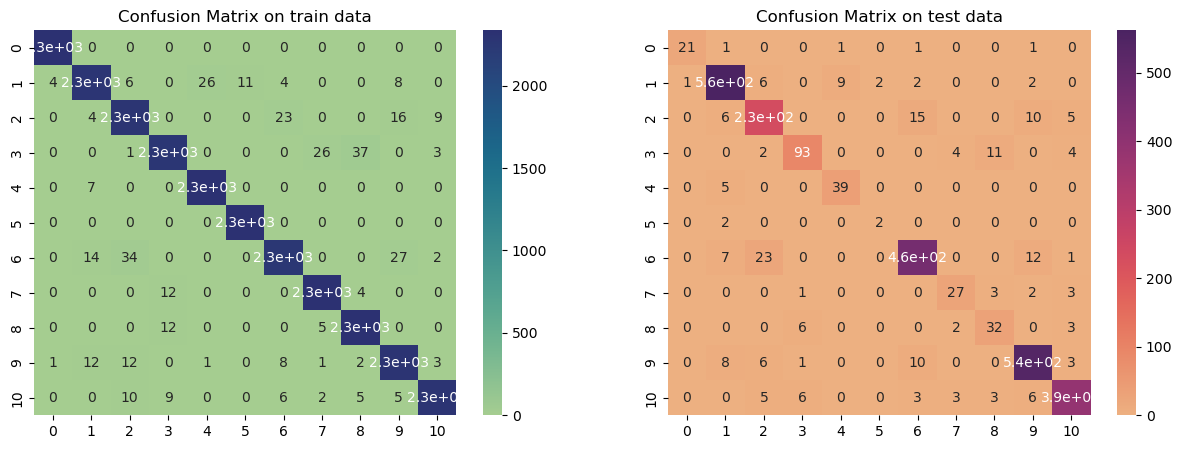

In [28]:
predict_and_report(rbf_clf,'SVM Classifer with Non-Linear kernel', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 5: Naive Bayes Evaluation

******************************* Training Data Analysis *******************************

Classification report of Gaussian NB on training data is:

precision    recall  f1-score   support

           0       0.91      0.84      0.87      2336
           1       0.42      0.59      0.49      2336
           2       0.71      0.37      0.49      2336
           3       0.52      0.75      0.61      2336
           4       0.72      0.72      0.72      2336
           5       0.85      0.92      0.88      2336
           6       0.86      0.38      0.53      2336
           7       0.59      0.49      0.53      2336
           8       0.75      0.46      0.57      2336
           9       0.43      0.89      0.58      2336
          10       0.86      0.57      0.68      2336

    accuracy                           0.63     25696
   macro avg       0.69      0.63      0.63     25696
weighted avg       0.69      0.63      0.63     25696

Accuracy score of Gaussian NB on training data is: 0.6348848069738481

******************************* Test Data Analysis *******************************

Classification report of Gaussian NB on test data is:

precision    recall  f1-score   support

           0       0.40      0.76      0.53        25
           1       0.56      0.60      0.58       584
           2       0.57      0.27      0.37       269
           3       0.47      0.71      0.57       114
           4       0.25      0.70      0.37        44
           5       0.04      0.50      0.07         4
           6       0.86      0.39      0.54       505
           7       0.24      0.14      0.18        36
           8       0.44      0.47      0.45        43
           9       0.55      0.88      0.68       567
          10       0.95      0.57      0.71       415

    accuracy                           0.58      2606
   macro avg       0.48      0.54      0.46      2606
weighted avg       0.66      0.58      0.58      2606

Accuracy score of Gaussian NB on test data is: 0.5817344589409056

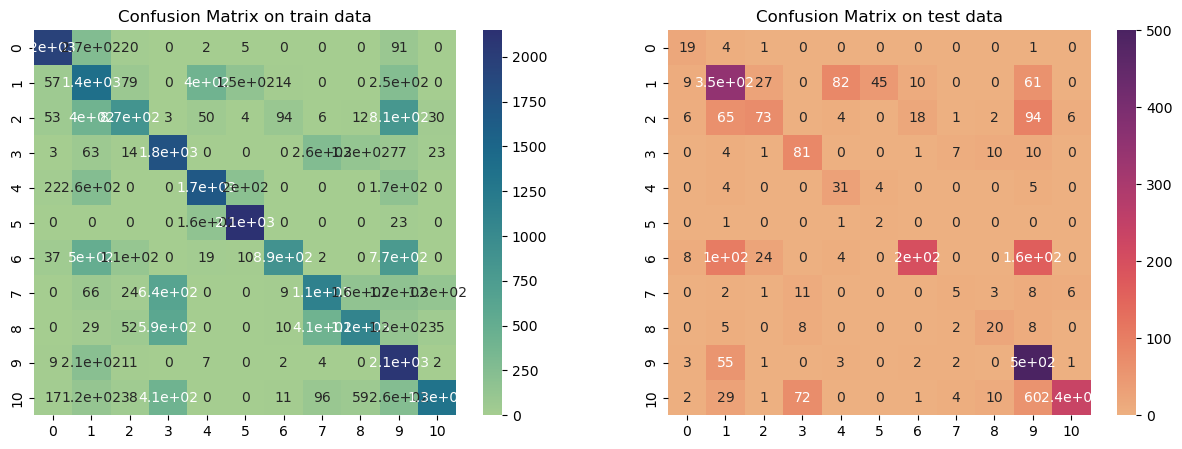

In [30]:
predict_and_report(nb_clf, 'Gaussian NB', x_train_mm, y_train_smt, x_test_mm, y_test)

### Conclusion:

Data pre-processing done by handling data imbalance using SMOTE. Scaled data with MinMaxScaler and lable encoded target variable 'Kingdom'.Trained five machine learning models Logistic regression, K-Nearest Neigbors, Support Vector Machines with linear and non-linear kernels, Random Forest and Naive Bayes. 
Out of all above models KNN and SVM with non-linear kernelagive good results.